# Importing laibraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# loading Dataset & Preprocessing

In [2]:
dataset= pd.read_csv('C:/Users/HP/Downloads/Assignment/book.csv')

In [3]:
dataset.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
dataset.shape

(2000, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# EDA

In [6]:
dataset.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Checking for Purchased and not purchased item qty. details to get insights

In [7]:
zero =[]
one = []
for i in dataset.columns:
    zero.append(list(dataset[i].value_counts())[0])
    one.append(list(dataset[i].value_counts())[1])

In [8]:
count_df = pd.DataFrame([zero,one], columns=dataset.copy().columns)

In [9]:
count_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [10]:

# Changing row names...

count_df.index = ['Not_Purchased', 'Purchased']
count_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
Not_Purchased,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
Purchased,846,495,862,564,429,482,552,227,74,97,217


In [11]:
# CHECKING WHICH PRODUCTE

print('maximum purchased item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('minimum purchased item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())


maximum purchased item: CookBks : 862
minimum purchased item: ItalAtlas : 1926


In [12]:
# Simplest way to sort elements..

sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df

,Not_Purchased,Purchased
CookBks,1138,862
ChildBks,1154,846
DoItYBks,1436,564
GeogBks,1448,552
YouthBks,1505,495
ArtBks,1518,482
RefBks,1571,429
ItalCook,1773,227
Florence,1783,217
ItalArt,1903,97


In [13]:

# adding Purchased% table into the dataset1.

sorted_df['Purchased%']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df

,Not_Purchased,Purchased,Purchased%
CookBks,1138,862,0.177915
ChildBks,1154,846,0.174613
DoItYBks,1436,564,0.116409
GeogBks,1448,552,0.113932
YouthBks,1505,495,0.102167
ArtBks,1518,482,0.099484
RefBks,1571,429,0.088545
ItalCook,1773,227,0.046852
Florence,1783,217,0.044788
ItalArt,1903,97,0.020021


In [14]:
# Finding out avergae of the total purchased% so that we get idea about min_support value setting.

np.mean(sorted_df['Purchased%'])


0.0909090909090909

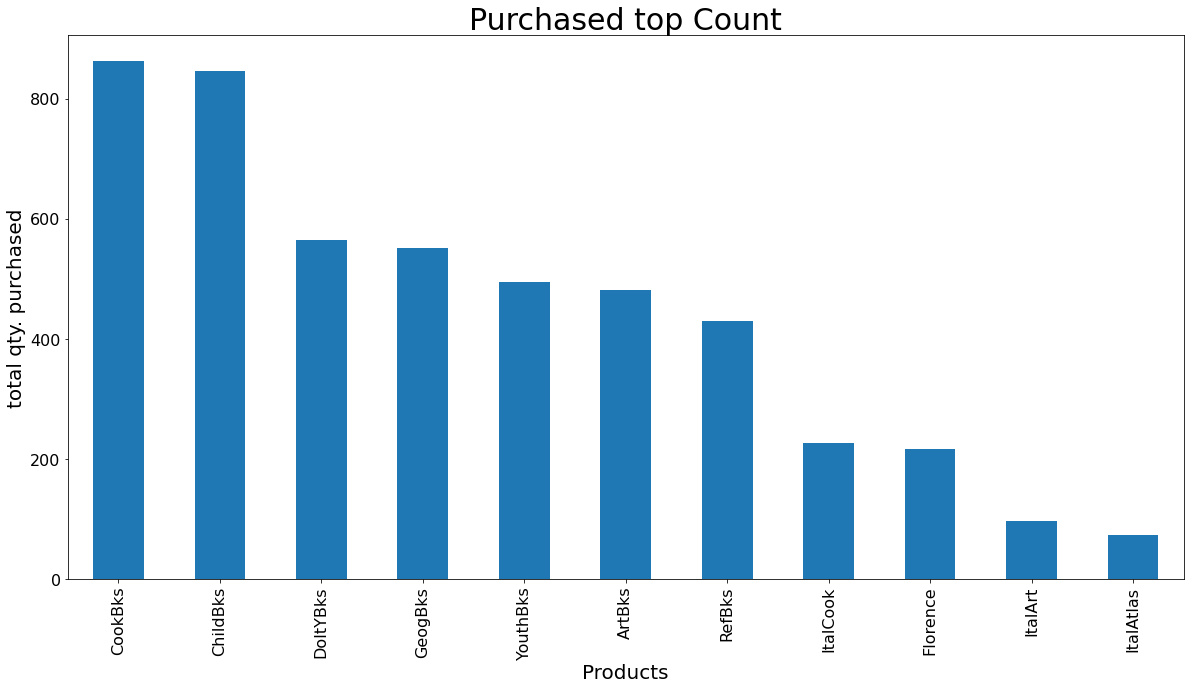

In [15]:
# Plotting sorted top purchased products..

fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('total qty. purchased', fontsize=20)
plt.show()

   # Apriori Rule

ref. used: https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

# 1: Support


concept

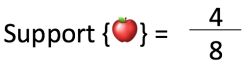

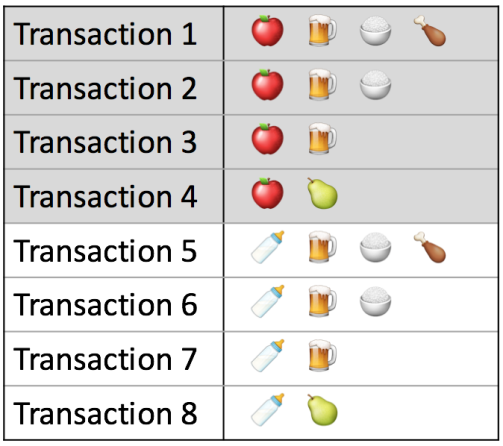

This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

Finding out support for each possible products or diff. product sets present in transction dataframe(dataset1)

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(dataset, min_support=0.05, use_colnames=True, max_len=3)

# min_support value can be choose by the user/business need
# max_len is item combinations..here i have taken as 5. total items in combination formed should not be more than 5

In [17]:
freq_items.shape

(76, 2)

In [18]:


# checking first 10 rows

freq_items.head(10)

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [19]:
# checking last 10 rows

freq_items.tail(10)

,support,itemsets
66,0.0585,"(CookBks, DoItYBks, ItalCook)"
67,0.0700,"(CookBks, ArtBks, RefBks)"
68,0.0890,"(CookBks, GeogBks, RefBks)"
69,0.1035,"(CookBks, GeogBks, ArtBks)"
70,0.0565,"(CookBks, ArtBks, ItalCook)"
71,0.0640,"(CookBks, GeogBks, ItalCook)"
72,0.0535,"(ArtBks, DoItYBks, RefBks)"
73,0.0585,"(GeogBks, DoItYBks, RefBks)"
74,0.0730,"(GeogBks, DoItYBks, ArtBks)"
75,0.0565,"(GeogBks, ArtBks, RefBks)"


# 2: Confidence 

Concept:

This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

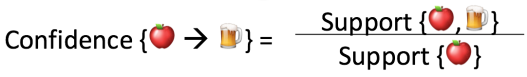

it might misrepresent the importance of an association.

This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure.

Note: To account for the base popularity of both constituent items, we use a third measure called lift.

# Building Association rules using confidence metrics.

In [20]:

# for this we need support value dataframe..that is fre_items from measure1.

confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

# min_threshold is nothing but setting min % crieteria. In this case i have choosen 20% 
#...confidence should be minimum 20%.

In [21]:
# checking combination in first 10 rows from dataset
confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [22]:
# checking combination in last 10 rows from dataset
confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
269,"(DoItYBks, ArtBks)",(GeogBks),0.1235,0.2760,0.0730,0.591093,2.141642,0.038914,1.770574
270,(GeogBks),"(DoItYBks, ArtBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
271,(DoItYBks),"(GeogBks, ArtBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
272,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
273,"(GeogBks, ArtBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
274,"(GeogBks, RefBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
275,"(RefBks, ArtBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
276,(GeogBks),"(RefBks, ArtBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866
277,(ArtBks),"(GeogBks, RefBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
278,(RefBks),"(GeogBks, ArtBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502


# 3: lift

Concept:

This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

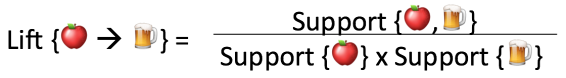

# Building Association rules using confidence metrics.

In [23]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)

In [24]:
lift_association.shape

(294, 9)

In [25]:
lift_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [26]:
lift_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,"(DoItYBks, ArtBks)",(GeogBks),0.1235,0.2760,0.0730,0.591093,2.141642,0.038914,1.770574
285,(GeogBks),"(DoItYBks, ArtBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
286,(DoItYBks),"(GeogBks, ArtBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
287,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
288,"(GeogBks, ArtBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
289,"(GeogBks, RefBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
290,"(RefBks, ArtBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
291,(GeogBks),"(RefBks, ArtBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866
292,(ArtBks),"(GeogBks, RefBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
293,(RefBks),"(GeogBks, ArtBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502


#  Eliminating redudancy sets

In [27]:
# As per above output observation, it is clear that when same items repeated..
#...(for ex: in first row: A-->B, and in next row B-->A) gives same leverage & lift but confidence is different.
#...this is known as redudency when same item set shuffled as ancedents & consequent.
#.... so to eliminates in easist way..will sort n the basis of leverage & confidence.

redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [28]:
redundancy.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,"(GeogBks, RefBks)",(DoItYBks),0.1105,0.2820,0.0585,0.529412,1.877347,0.027339,1.525750
285,(DoItYBks),"(GeogBks, RefBks)",0.2820,0.1105,0.0585,0.207447,1.877347,0.027339,1.122322
286,"(DoItYBks, ArtBks)",(RefBks),0.1235,0.2145,0.0535,0.433198,2.019573,0.027009,1.385846
287,(RefBks),"(DoItYBks, ArtBks)",0.2145,0.1235,0.0535,0.249417,2.019573,0.027009,1.167759
288,(ItalCook),(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
289,"(CookBks, ItalCook)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(CookBks, ItalCook)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(GeogBks, ItalCook)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130
293,(ChildBks),"(GeogBks, ItalCook)",0.4230,0.0640,0.0525,0.124113,1.939273,0.025428,1.068632


In [29]:
# Now check output of above cells, when leverage and lift are same for consequent rows..then compare with the value of confidence
#...if confidence of middle cell found less than two side cells..drop it.
# dropping odd index rows..since it contains less confidence
# ultimately this will help us to elminate repeated combination..which has low lift & confidence..

unique_rules = redundancy.iloc[::1]
unique_rules.shape

(294, 9)

In [30]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
5,(DoItYBks),"(ChildBks, CookBks)",0.282,0.256,0.1460,0.517730,2.022385,0.073808,1.542706
6,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
7,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


In [31]:
unique_rules.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,"(GeogBks, RefBks)",(DoItYBks),0.1105,0.2820,0.0585,0.529412,1.877347,0.027339,1.525750
285,(DoItYBks),"(GeogBks, RefBks)",0.2820,0.1105,0.0585,0.207447,1.877347,0.027339,1.122322
286,"(DoItYBks, ArtBks)",(RefBks),0.1235,0.2145,0.0535,0.433198,2.019573,0.027009,1.385846
287,(RefBks),"(DoItYBks, ArtBks)",0.2145,0.1235,0.0535,0.249417,2.019573,0.027009,1.167759
288,(ItalCook),(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
289,"(CookBks, ItalCook)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(CookBks, ItalCook)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(GeogBks, ItalCook)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130
293,(ChildBks),"(GeogBks, ItalCook)",0.4230,0.0640,0.0525,0.124113,1.939273,0.025428,1.068632


# Generated Rules analysis/Processing

We have obtained unique_rules with metric='lift'. Now, this unique_rules dataframe will be used for analysis..just filtering as per threshold value set/required & obtaining diff. pairs of item sets.

Note: lift is set to 1. in previous code. Since if lift is equal to or greater than 1..that means chances to pick consequents items by customer is more..!!

In [32]:
top_sort = unique_rules[unique_rules['lift']>1.5]

Top 20 combinations w.r.t. Lift more than 1.5

In [33]:
top_sort = top_sort.sort_values(by='lift', ascending=False)
top_sort.reset_index(inplace=True)

In [34]:
top_sort = top_sort.drop(['index'],axis=1)

In [35]:
top_sort.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
1,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
2,(ItalCook),"(CookBks, ArtBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
3,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
4,"(CookBks, GeogBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
5,(ItalCook),"(CookBks, GeogBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
6,"(ChildBks, CookBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
7,(ItalCook),"(ChildBks, CookBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
8,(ItalCook),"(CookBks, DoItYBks)",0.1135,0.1875,0.0585,0.515419,2.748899,0.037219,1.676705
9,"(CookBks, DoItYBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517


In [36]:
top_sort.tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
287,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
288,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
289,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
290,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
291,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678


# Unique item names from to 20 lift combinations

In [37]:
x = top_sort[['antecedents','consequents']]

In [38]:

item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list .append(j)

In [39]:

for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [40]:
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    top_items =[]
    for m in unique_list:
        top_items.append(m)
    print(top_items)

In [41]:
unique(item_list)

['CookBks', 'ChildBks', 'ArtBks', 'RefBks', 'DoItYBks', 'ItalCook', 'GeogBks', 'YouthBks']
